# 5's Classifier

In [1]:
%matplotlib inline
import nnet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score

In [2]:
def predictionReshape(probas, m):
    p = np.zeros((1,m))
    less_than_half = (probas[0,:] <= 0.5).astype(np.int)
    greater_than_half = (probas[0,:] > .5).astype(np.int)
    p_temp = np.multiply(less_than_half, 0)
    p[0] = np.add(p_temp, greater_than_half)
    return p

In [3]:
digits = fetch_mldata("MNIST original")

X, y = digits["data"],digits["target"]
print(np.unique(y))
y_5 = (y == 5).astype(np.float32)
print(np.unique(y_5))
X_train, X_test, y_train, y_test = train_test_split(X, y_5, test_size=0.30, random_state=42, stratify=y_5)

X_train = X_train.T
X_train = X_train/ 255
X_test = X_test.T
X_test = X_test/ 255
y_train = np.reshape(y_train, (1, y_train.shape[0]))
y_test = np.reshape(y_test, (1, y_test.shape[0]))
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)

/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1.]
(1, 49000)
(784, 49000)
(784, 21000)


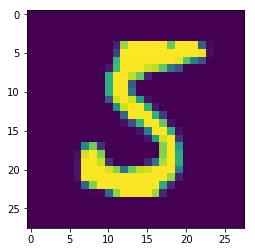

In [4]:
is_five = X_test[:, y_test[0,:] == 1][:, 0:5]
is_not_five = X_test[:, y_test[0,:] != 1][:, 0:5]
plt.figure("FIVE")
plt.imshow(is_five[:,0].reshape(28,28))
plt.show()

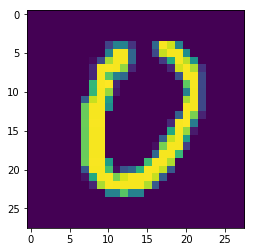

In [5]:
plt.figure("NOT FIVE")
plt.imshow(is_not_five[:,0].reshape(28,28))
plt.show()

In [6]:
is_five = np.reshape(is_five, (is_five.shape[0], 5))
is_not_five = np.reshape(is_not_five, (is_not_five.shape[0], 5))

In [7]:
optimizer = nnet.Momentum(learning_rate=0.1)
regulizer = nnet.L2Regularization(lamda=0.5)
loss_func = nnet.CrossEntropyLoss()

In [8]:
newNet = nnet.Net(regularization=regulizer, optimizer=optimizer, cost_function=loss_func)

input = newNet.input_placeholder(shape=(784, None))
# Just showing all activations
hidden1 = newNet.dense(input, numOfUnits=50, activation=nnet.Relu())
hidden2 = newNet.dense(hidden1, numOfUnits=30, activation=nnet.Relu())
hidden3 = newNet.dense(hidden2, numOfUnits=10, activation=nnet.Relu())
hidden4 = newNet.dense(hidden3, numOfUnits=4, activation=nnet.Relu())
output = newNet.dense(hidden4, numOfUnits=1, activation=nnet.Sigmoid())

In [9]:
num_epochs = 500

costs = []

for epoch in range(num_epochs):
    _, loss = newNet.train(X_train, y_train)
    costs.append(loss)
    if( epoch % 5 == 0):
        pred_y_V = newNet.predict(is_five)
        print("Predicted Probabilities:(Fives) ", pred_y_V)
        pred_y_V = predictionReshape(pred_y_V, 5)
        print("Predicted Results:(Fives) ", pred_y_V)
        print("---------------")
        pred_y_V2 = newNet.predict(is_not_five)
        print("Predicted Probabilities:(!Fives) ", pred_y_V2)
        pred_y_V2 = predictionReshape(pred_y_V2, 5)
        print("Predicted Probabilities:(!Fives) ", pred_y_V2)
        print("------ Epoch: ", epoch, " ------")
        print("Corss entropy Loss: ", loss)
        print("----------------------------")

Predicted Probabilities:(Fives)  [[0.48156892 0.51724933 0.49082113 0.48359663 0.49738764]]
Predicted Results:(Fives)  [[0. 1. 0. 0. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.49823386 0.51016488 0.49413719 0.48564909 0.49373965]]
Predicted Probabilities:(!Fives)  [[0. 1. 0. 0. 0.]]
------ Epoch:  0  ------
Corss entropy Loss:  0.681559697959646
----------------------------
Predicted Probabilities:(Fives)  [[0.45720606 0.49506429 0.47152325 0.4641545  0.4753015 ]]
Predicted Results:(Fives)  [[0. 0. 0. 0. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.48222212 0.48374758 0.46835173 0.46419915 0.46616418]]
Predicted Probabilities:(!Fives)  [[0. 0. 0. 0. 0.]]
------ Epoch:  5  ------
Corss entropy Loss:  0.6543585840725344
----------------------------
Predicted Probabilities:(Fives)  [[0.41606916 0.45803875 0.43791157 0.4234993  0.43547832]]
Predicted Results:(Fives)  [[0. 0. 0. 0. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.43632374 0.43446039 0

Predicted Probabilities:(Fives)  [[0.19066943 0.20486822 0.07456269 0.24173887 0.07425505]]
Predicted Results:(Fives)  [[0. 0. 0. 0. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.08699845 0.03986791 0.01351736 0.02288016 0.02300676]]
Predicted Probabilities:(!Fives)  [[0. 0. 0. 0. 0.]]
------ Epoch:  105  ------
Corss entropy Loss:  0.2082874578291003
----------------------------
Predicted Probabilities:(Fives)  [[0.20003915 0.21185514 0.07111448 0.25695741 0.07120895]]
Predicted Results:(Fives)  [[0. 0. 0. 0. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.08307467 0.03517395 0.01067961 0.0194506  0.01909627]]
Predicted Probabilities:(!Fives)  [[0. 0. 0. 0. 0.]]
------ Epoch:  110  ------
Corss entropy Loss:  0.20152589979984592
----------------------------
Predicted Probabilities:(Fives)  [[0.21003006 0.22671889 0.06837164 0.27990791 0.06889471]]
Predicted Results:(Fives)  [[0. 0. 0. 0. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.081611   0.0312

Predicted Probabilities:(Fives)  [[0.43225445 0.36794026 0.10162278 0.80189185 0.06798385]]
Predicted Results:(Fives)  [[0. 0. 0. 1. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.03832115 0.00607534 0.00103471 0.00321058 0.00094762]]
Predicted Probabilities:(!Fives)  [[0. 0. 0. 0. 0.]]
------ Epoch:  210  ------
Corss entropy Loss:  0.11004582955103585
----------------------------
Predicted Probabilities:(Fives)  [[0.44931295 0.38512437 0.10468912 0.82006678 0.06720991]]
Predicted Results:(Fives)  [[0. 0. 0. 1. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.03726321 0.00568589 0.00103263 0.00312502 0.00088207]]
Predicted Probabilities:(!Fives)  [[0. 0. 0. 0. 0.]]
------ Epoch:  215  ------
Corss entropy Loss:  0.10776322522108425
----------------------------
Predicted Probabilities:(Fives)  [[0.4644896  0.41528221 0.10807029 0.83634743 0.06699493]]
Predicted Results:(Fives)  [[0. 0. 0. 1. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.03639844 0.005

Predicted Probabilities:(Fives)  [[0.59241758 0.83052304 0.39005109 0.96071975 0.08837075]]
Predicted Results:(Fives)  [[1. 1. 0. 1. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.01671986 0.00358493 0.00157223 0.00247469 0.00050408]]
Predicted Probabilities:(!Fives)  [[0. 0. 0. 0. 0.]]
------ Epoch:  315  ------
Corss entropy Loss:  0.08265009627833576
----------------------------
Predicted Probabilities:(Fives)  [[0.60199784 0.84414888 0.4094501  0.96301686 0.08943085]]
Predicted Results:(Fives)  [[1. 1. 0. 1. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.01591554 0.00345477 0.00155951 0.00242825 0.00048424]]
Predicted Probabilities:(!Fives)  [[0. 0. 0. 0. 0.]]
------ Epoch:  320  ------
Corss entropy Loss:  0.08189078788896897
----------------------------
Predicted Probabilities:(Fives)  [[0.60846335 0.85553977 0.42876138 0.96505786 0.09050342]]
Predicted Results:(Fives)  [[1. 1. 0. 1. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.01508409 0.003

Predicted Probabilities:(Fives)  [[0.80710124 0.94148045 0.62496439 0.9775839  0.19087298]]
Predicted Results:(Fives)  [[1. 1. 1. 1. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.00571561 0.00198184 0.0010088  0.00166024 0.000353  ]]
Predicted Probabilities:(!Fives)  [[0. 0. 0. 0. 0.]]
------ Epoch:  420  ------
Corss entropy Loss:  0.07186204446817344
----------------------------
Predicted Probabilities:(Fives)  [[0.81148653 0.94308573 0.62825982 0.97807692 0.19747262]]
Predicted Results:(Fives)  [[1. 1. 1. 1. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.00547612 0.0019489  0.00099909 0.00161325 0.00035467]]
Predicted Probabilities:(!Fives)  [[0. 0. 0. 0. 0.]]
------ Epoch:  425  ------
Corss entropy Loss:  0.0715369143071476
----------------------------
Predicted Probabilities:(Fives)  [[0.81609703 0.9446261  0.63166813 0.97866041 0.20419765]]
Predicted Results:(Fives)  [[1. 1. 1. 1. 0.]]
---------------
Predicted Probabilities:(!Fives)  [[0.00526614 0.0019

In [10]:
pred_y = newNet.predict(X_test)
print(pred_y.shape)
pred_y = predictionReshape(pred_y, X_test.shape[1])
print(y_test.shape)
print("Shape Of Predictions: \t", pred_y.shape)
incorrect_X = np.not_equal(pred_y, y_test)
unique, counts = np.unique(incorrect_X, return_counts=True)
print("Predictions: \t", dict(zip(unique, counts)))
print("Precision score: \t", precision_score(y_test[0,:], pred_y[0,:]))
print("Recall score: \t", recall_score(y_test[0,:], pred_y[0,:]))
print("F1 score: \t", f1_score(y_test[0,:], pred_y[0,:]))

(1, 21000)
(1, 21000)
Shape Of Predictions: 	 (1, 21000)
Predictions: 	 {False: 20456, True: 544}
Precision score: 	 0.8800675675675675
Recall score: 	 0.8252375923970433
F1 score: 	 0.8517711171662125


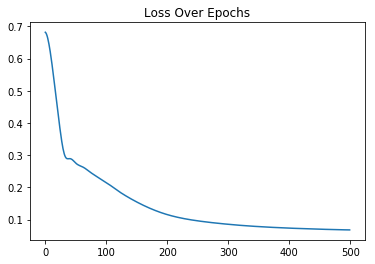

In [11]:
# make an agg figure
fig, ax = plt.subplots()
ax.plot(costs)
ax.set_title('Loss Over Epochs')
fig.canvas.draw()
# grab the pixel buffer and dump it into a numpy array
X = np.array(fig.canvas.renderer._renderer)

# now display the array X as an Axes in a new figure
plt.show()

# MNIST Classifier

In [12]:
digits = fetch_mldata("MNIST original")

X, y = digits["data"],digits["target"]
y = y.astype(np.int)
print(np.unique(y))
ohm = np.zeros((y.shape[0], 10))
ohm[np.arange(y.shape[0]), y] = 1
y = np.reshape(y, (1, y.shape[0]))
X_train, X_test, y_train, y_test = train_test_split(X, ohm, test_size=0.30, random_state=42, stratify=ohm)


X_train = X_train.T
X_train = X_train/ 255
X_test = X_test.T
X_test = X_test/ 255
y_train = y_train.T
y_test = y_test.T

is_zeros = X.T[:, y[0,:] == 0][:, 0:2]
is_threes = X.T[:, y[0,:] == 3][:, 0:2]
is_fives = X.T[:, y[0,:] == 5][:, 0:2]
is_eights = X.T[:, y[0,:] == 8][:, 0:2]

/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


[0 1 2 3 4 5 6 7 8 9]


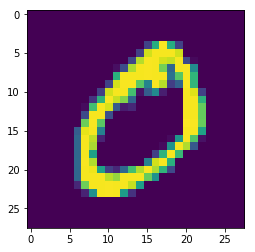

In [14]:
plt.figure("ZERO")
plt.imshow(is_zeros[:,0].reshape(28,28))
plt.show()

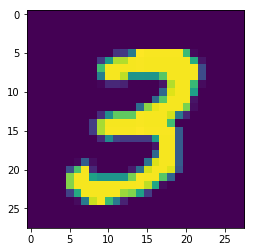

In [15]:
plt.figure("THREE")
plt.imshow(is_threes[:,0].reshape(28,28))
plt.show()

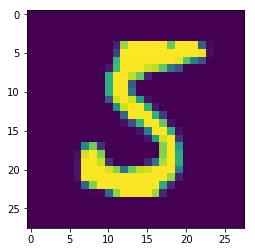

In [16]:
plt.figure("FIVE")
plt.imshow(is_five[:,0].reshape(28,28))
plt.show()

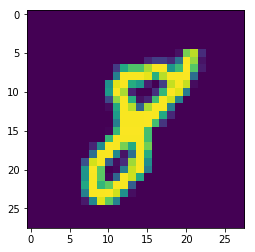

In [17]:
plt.figure("EIGHT")
plt.imshow(is_eights[:,0].reshape(28,28))
plt.show()

In [18]:
is_zeros = np.reshape(is_zeros, (is_zeros.shape[0], 2))
is_threes = np.reshape(is_threes, (is_threes.shape[0], 2))
is_fives = np.reshape(is_fives, (is_fives.shape[0], 2))
is_eights = np.reshape(is_eights, (is_eights.shape[0], 2))

In [22]:
optimizer = nnet.Momentum(learning_rate=0.05)
regulizer = nnet.L2Regularization(lamda=0.05)
loss_func = nnet.SoftmaxCrossEntropyLoss()

newNet = nnet.Net(regularization=regulizer, optimizer=optimizer, cost_function=loss_func)

input = newNet.input_placeholder(shape=(784, None))
# Just showing all activations
hidden1 = newNet.dense(input, numOfUnits=100, activation=nnet.Relu())
hidden2 = newNet.dense(hidden1, numOfUnits=80, activation=nnet.Relu())
hidden3 = newNet.dense(hidden2, numOfUnits=50, activation=nnet.Relu())
hidden4 = newNet.dense(hidden3, numOfUnits=30, activation=nnet.Relu())
hidden5 = newNet.dense(hidden4, numOfUnits=20, activation=nnet.Relu())
hidden6 = newNet.dense(hidden5, numOfUnits=10, activation=nnet.Sigmoid())
output = newNet.dense(hidden6, numOfUnits=10, activation=nnet.Softmax())

In [23]:
num_epochs =500

costs = []

for epoch in range(num_epochs):
    _, loss = newNet.train(X_train, y_train)
    costs.append(loss)
    if( epoch % 10 == 0):
        pred_y_zeros = newNet.predict(is_zeros)
        print("Zeros: ",pred_y_zeros.T, " Predicted Values: ", np.argmax(pred_y_zeros, axis=0))
        pred_y_threes = newNet.predict(is_threes)
        print("Threes: ", pred_y_threes.T, " Predicted Values: ", np.argmax(pred_y_threes, axis=0))
        pred_y_fives = newNet.predict(is_fives)
        print("Fives: ", pred_y_fives.T, " Predicted Values: ", np.argmax(pred_y_fives, axis=0))
        pred_y_eights = newNet.predict(is_eights)
        print("Eights: ", pred_y_eights.T, " Predicted Values: ", np.argmax(pred_y_eights, axis=0))

        print("------ Epoch: ", epoch, " ------")
        print("Softmax entropy Loss: ", loss)
        print("----------------------------")

Zeros:  [[0.05433785 0.05186009 0.08366308 0.1907918  0.08230973 0.01654315
  0.10461298 0.21078525 0.10903723 0.09605882]
 [0.06504771 0.02889673 0.07562358 0.31571893 0.03537058 0.00861172
  0.06736955 0.14517775 0.17670632 0.08147712]]  Predicted Values:  [7 3]
Threes:  [[0.12715327 0.03633187 0.09744566 0.10431838 0.11191481 0.03833413
  0.22802356 0.13799635 0.06445295 0.05402902]
 [0.09999852 0.10001964 0.09995428 0.10001061 0.10002123 0.10002592
  0.09998509 0.1000066  0.09998462 0.09999349]]  Predicted Values:  [6 5]
Fives:  [[0.0999948  0.10001766 0.09995009 0.10003223 0.10001923 0.10001445
  0.09997194 0.1000155  0.09998186 0.10000226]
 [0.08797464 0.0675356  0.19611504 0.1157144  0.04539342 0.01947597
  0.16467305 0.05813675 0.05786609 0.18711504]]  Predicted Values:  [3 2]
Eights:  [[0.17113573 0.03569488 0.16031411 0.09824721 0.08473781 0.02342666
  0.20324322 0.0794811  0.02378526 0.11993402]
 [0.10242674 0.06725547 0.22326886 0.04370076 0.04651027 0.02649326
  0.27904366

Zeros:  [[0.19200557 0.0624232  0.18290442 0.05406731 0.07674907 0.07321325
  0.20928358 0.05815104 0.0342194  0.05698316]
 [0.19200557 0.0624232  0.18290442 0.05406732 0.07674907 0.07321325
  0.20928358 0.05815103 0.0342194  0.05698316]]  Predicted Values:  [6 6]
Threes:  [[0.0324916  0.07844644 0.0442414  0.30060629 0.06163346 0.05992708
  0.05632678 0.09847384 0.13117276 0.13668036]
 [0.0324916  0.07844644 0.0442414  0.30060629 0.06163346 0.05992708
  0.05632678 0.09847384 0.13117276 0.13668036]]  Predicted Values:  [3 3]
Fives:  [[0.02971211 0.07663595 0.04318492 0.21330355 0.09175106 0.05363025
  0.05657021 0.16126226 0.13243104 0.14151865]
 [0.1428945  0.05795905 0.11832829 0.06690007 0.07464837 0.12860848
  0.23668204 0.02650428 0.03158137 0.11589356]]  Predicted Values:  [3 6]
Eights:  [[0.02971211 0.07663595 0.04318492 0.21330355 0.09175106 0.05363025
  0.05657021 0.16126226 0.13243104 0.14151865]
 [0.03249159 0.07844644 0.0442414  0.30060586 0.06163359 0.05992706
  0.0563268 

Zeros:  [[0.21975637 0.04058548 0.20342101 0.01464087 0.06659414 0.09783976
  0.28785972 0.02215189 0.02314533 0.02400544]
 [0.2411662  0.02372928 0.10654946 0.03301218 0.15422617 0.10394959
  0.25506017 0.01634138 0.03782756 0.028138  ]]  Predicted Values:  [6 6]
Threes:  [[0.02640753 0.0262361  0.02093944 0.25234002 0.07163364 0.05895943
  0.01757328 0.06783402 0.40285466 0.05522188]
 [0.02754874 0.07331943 0.036098   0.3487338  0.06219418 0.07071928
  0.03828795 0.09416358 0.11465335 0.13428168]]  Predicted Values:  [8 3]
Fives:  [[0.04404198 0.08576447 0.05653665 0.1362738  0.08241695 0.23715187
  0.05493437 0.06195514 0.10330897 0.1376158 ]
 [0.20498515 0.02718214 0.11569738 0.01745048 0.19387039 0.08699809
  0.25843708 0.03134925 0.03430079 0.02972926]]  Predicted Values:  [5 6]
Eights:  [[0.02294624 0.02646307 0.01950546 0.16174984 0.10988759 0.05005906
  0.01730269 0.12107816 0.41042322 0.06058467]
 [0.02754874 0.07331943 0.036098   0.3487338  0.06219418 0.07071928
  0.03828795

Zeros:  [[0.24199769 0.03171063 0.20937723 0.01321127 0.06659142 0.10052686
  0.27895481 0.01902322 0.01802103 0.02058584]
 [0.26453381 0.01608093 0.10405634 0.03109199 0.1605207  0.11179062
  0.24403576 0.01266979 0.03010192 0.02511814]]  Predicted Values:  [6 0]
Threes:  [[0.0208389  0.02071179 0.01483233 0.31497755 0.07048755 0.0724513
  0.01176332 0.06229802 0.35487411 0.05676513]
 [0.02152011 0.03140044 0.01816165 0.50046313 0.0375233  0.04082332
  0.01360001 0.09163123 0.13894871 0.1059281 ]]  Predicted Values:  [8 3]
Fives:  [[0.03580911 0.10846073 0.04780506 0.23346427 0.03766409 0.14439055
  0.042211   0.07649867 0.0300095  0.24368702]
 [0.09347776 0.04175084 0.13146277 0.02503906 0.17892694 0.14567273
  0.15508228 0.04789295 0.14194797 0.03874671]]  Predicted Values:  [9 4]
Eights:  [[0.02122568 0.01822304 0.0171223  0.12107863 0.19618874 0.03693356
  0.013502   0.05460882 0.45725797 0.06385925]
 [0.02152011 0.03140044 0.01816165 0.50046313 0.0375233  0.04082332
  0.01360001 

Zeros:  [[0.25375834 0.02453063 0.20361484 0.01062054 0.06067167 0.0955907
  0.30069534 0.01726295 0.01528379 0.0179712 ]
 [0.28391371 0.0111414  0.09293571 0.02620486 0.15488118 0.11331846
  0.25786873 0.01037149 0.02602939 0.02333509]]  Predicted Values:  [6 0]
Threes:  [[0.01577687 0.02569875 0.01213743 0.56978358 0.030044   0.0382863
  0.00926892 0.08164265 0.11486671 0.1024948 ]
 [0.01577687 0.02569875 0.01213743 0.56978358 0.030044   0.0382863
  0.00926892 0.08164265 0.11486671 0.1024948 ]]  Predicted Values:  [3 3]
Fives:  [[0.05119096 0.11430683 0.07305912 0.10729575 0.04012893 0.25113764
  0.09437249 0.04532284 0.0370223  0.18616314]
 [0.15119047 0.14029615 0.25425132 0.01107875 0.03580468 0.21616748
  0.11528227 0.01055479 0.03359335 0.03178073]]  Predicted Values:  [5 2]
Eights:  [[0.03205662 0.01257744 0.02350306 0.08603061 0.12891012 0.07751797
  0.02690858 0.01304673 0.5648504  0.03459848]
 [0.01577687 0.02569875 0.01213743 0.56978358 0.030044   0.0382863
  0.00926892 0.0

Zeros:  [[0.30873535 0.00807266 0.08661534 0.02106269 0.14066624 0.10879667
  0.27201256 0.00841649 0.02413365 0.02148834]
 [0.30873535 0.00807266 0.08661534 0.02106269 0.14066624 0.10879667
  0.27201256 0.00841649 0.02413365 0.02148834]]  Predicted Values:  [0 0]
Threes:  [[0.0121761  0.02201753 0.00857481 0.62601838 0.02263221 0.03396288
  0.00668162 0.07097153 0.10333111 0.09363384]
 [0.0121761  0.02201753 0.00857481 0.62601838 0.02263221 0.03396288
  0.00668162 0.07097153 0.10333111 0.09363384]]  Predicted Values:  [3 3]
Fives:  [[0.04601254 0.0672898  0.04408731 0.06235135 0.05948227 0.45440604
  0.07046813 0.02359346 0.08148164 0.09082747]
 [0.14621927 0.13969437 0.28326276 0.00898437 0.02935911 0.20868459
  0.11668729 0.00820768 0.03269659 0.02620396]]  Predicted Values:  [5 2]
Eights:  [[0.02825822 0.00943585 0.01794165 0.08204621 0.11651807 0.07660264
  0.02222561 0.00988461 0.60577064 0.0313165 ]
 [0.0121761  0.02201753 0.00857481 0.62601838 0.02263221 0.03396288
  0.00668162

Zeros:  [[0.33881962 0.00605332 0.08071093 0.01686375 0.12579389 0.10262845
  0.28023906 0.00686056 0.02262628 0.01940414]
 [0.33881962 0.00605332 0.08071093 0.01686375 0.12579389 0.10262845
  0.28023906 0.00686056 0.02262628 0.01940414]]  Predicted Values:  [0 0]
Threes:  [[0.00978371 0.01926148 0.00620733 0.67442012 0.01672862 0.02980388
  0.00497715 0.06143474 0.09592459 0.08145839]
 [0.00978371 0.01926148 0.00620733 0.67442012 0.01672862 0.02980388
  0.00497715 0.06143474 0.09592459 0.08145839]]  Predicted Values:  [3 3]
Fives:  [[0.0490544  0.12016754 0.058493   0.12136433 0.03041436 0.28033871
  0.07805009 0.03683532 0.03596067 0.18932157]
 [0.09848713 0.19660666 0.19699767 0.01227517 0.01162231 0.34418694
  0.08256174 0.01664456 0.02285939 0.01775844]]  Predicted Values:  [5 5]
Eights:  [[0.02512711 0.00719946 0.01373573 0.07597748 0.10039786 0.07144111
  0.01827244 0.00752044 0.6534378  0.02689056]
 [0.00978371 0.01926148 0.00620733 0.67442012 0.01672862 0.02980388
  0.00497715

In [28]:
pred_y = newNet.predict(X_test)
pred_y_1 = np.argmax(pred_y, axis=0)
y_test_1 = np.argmax(y_test, axis=0)
print(pred_y_1[0:10])
print(y_test_1[0:10])
print("Shape Of Predictions: \t", pred_y.shape)
incorrect_X = np.not_equal(pred_y_1, y_test_1)
unique, counts = np.unique(incorrect_X, return_counts=True)
print("Predictions: \t", dict(zip(unique, counts)))
print("Precision score: \t", precision_score(pred_y_1, y_test_1, average="weighted"))
print("Recall score: \t", recall_score(pred_y_1, y_test_1, average="weighted"))
print("F1 score: \t", f1_score(pred_y_1, y_test_1, average="weighted"))

[9 7 4 5 0 3 7 1 5 6]
[9 7 4 4 0 3 7 1 5 2]
Shape Of Predictions: 	 (10, 21000)
Predictions: 	 {False: 17743, True: 3257}
Precision score: 	 0.847332595937974
Recall score: 	 0.8449047619047619
F1 score: 	 0.845531912342788


[False False False ... False False False]
9
4


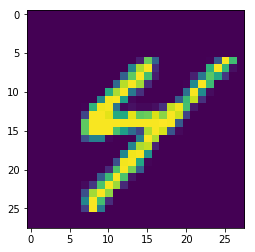

In [40]:
print(pred_y_1 != y_test_1)
print(pred_y_1[pred_y_1 != y_test_1][7])
print(y_test_1[pred_y_1 != y_test_1][7])
X_test[:, pred_y_1 != y_test_1][0].shape
wrong = X_test[:, pred_y_1 != y_test_1][:, 7]
plt.imshow(wrong.reshape(28,28))
plt.show()

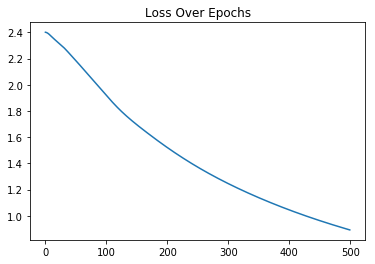

In [29]:
# make an agg figure
fig, ax = plt.subplots()
ax.plot(costs)
ax.set_title('Loss Over Epochs')
fig.canvas.draw()
# grab the pixel buffer and dump it into a numpy array
X = np.array(fig.canvas.renderer._renderer)

# now display the array X as an Axes in a new figure
plt.show()